Imports:

In [67]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from PIL import Image as im

Methods:

In [68]:
# methods required for median filter
def find_median(numbers):
  sorted_numbers = sorted(numbers)
  n = len(sorted_numbers)

  if n % 2 == 1:
    return sorted_numbers [n // 2]
  else:
    return (sorted_numbers [n // 2 -1] + sorted_numbers [n // 2]) / 2

def median_filter(image, kernel_size):
  kernel_height, kernel_width = kernel_size, kernel_size
  pad_height, pad_width = kernel_height // 2, kernel_width // 2
  padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)),
                        mode='reflect')

  filtered_image = np.zeros_like(image)

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      region = padded_image[i:i+kernel_height, j:j+kernel_width]
      region_values = region.flatten()
      filtered_image[i, j] = find_median(region_values)

  return filtered_image.astype(np.uint8)

Read the Image and Process It:

In [69]:
# read the image in grayscale
image = cv2.imread('/content/image.jpg', cv2.IMREAD_GRAYSCALE)

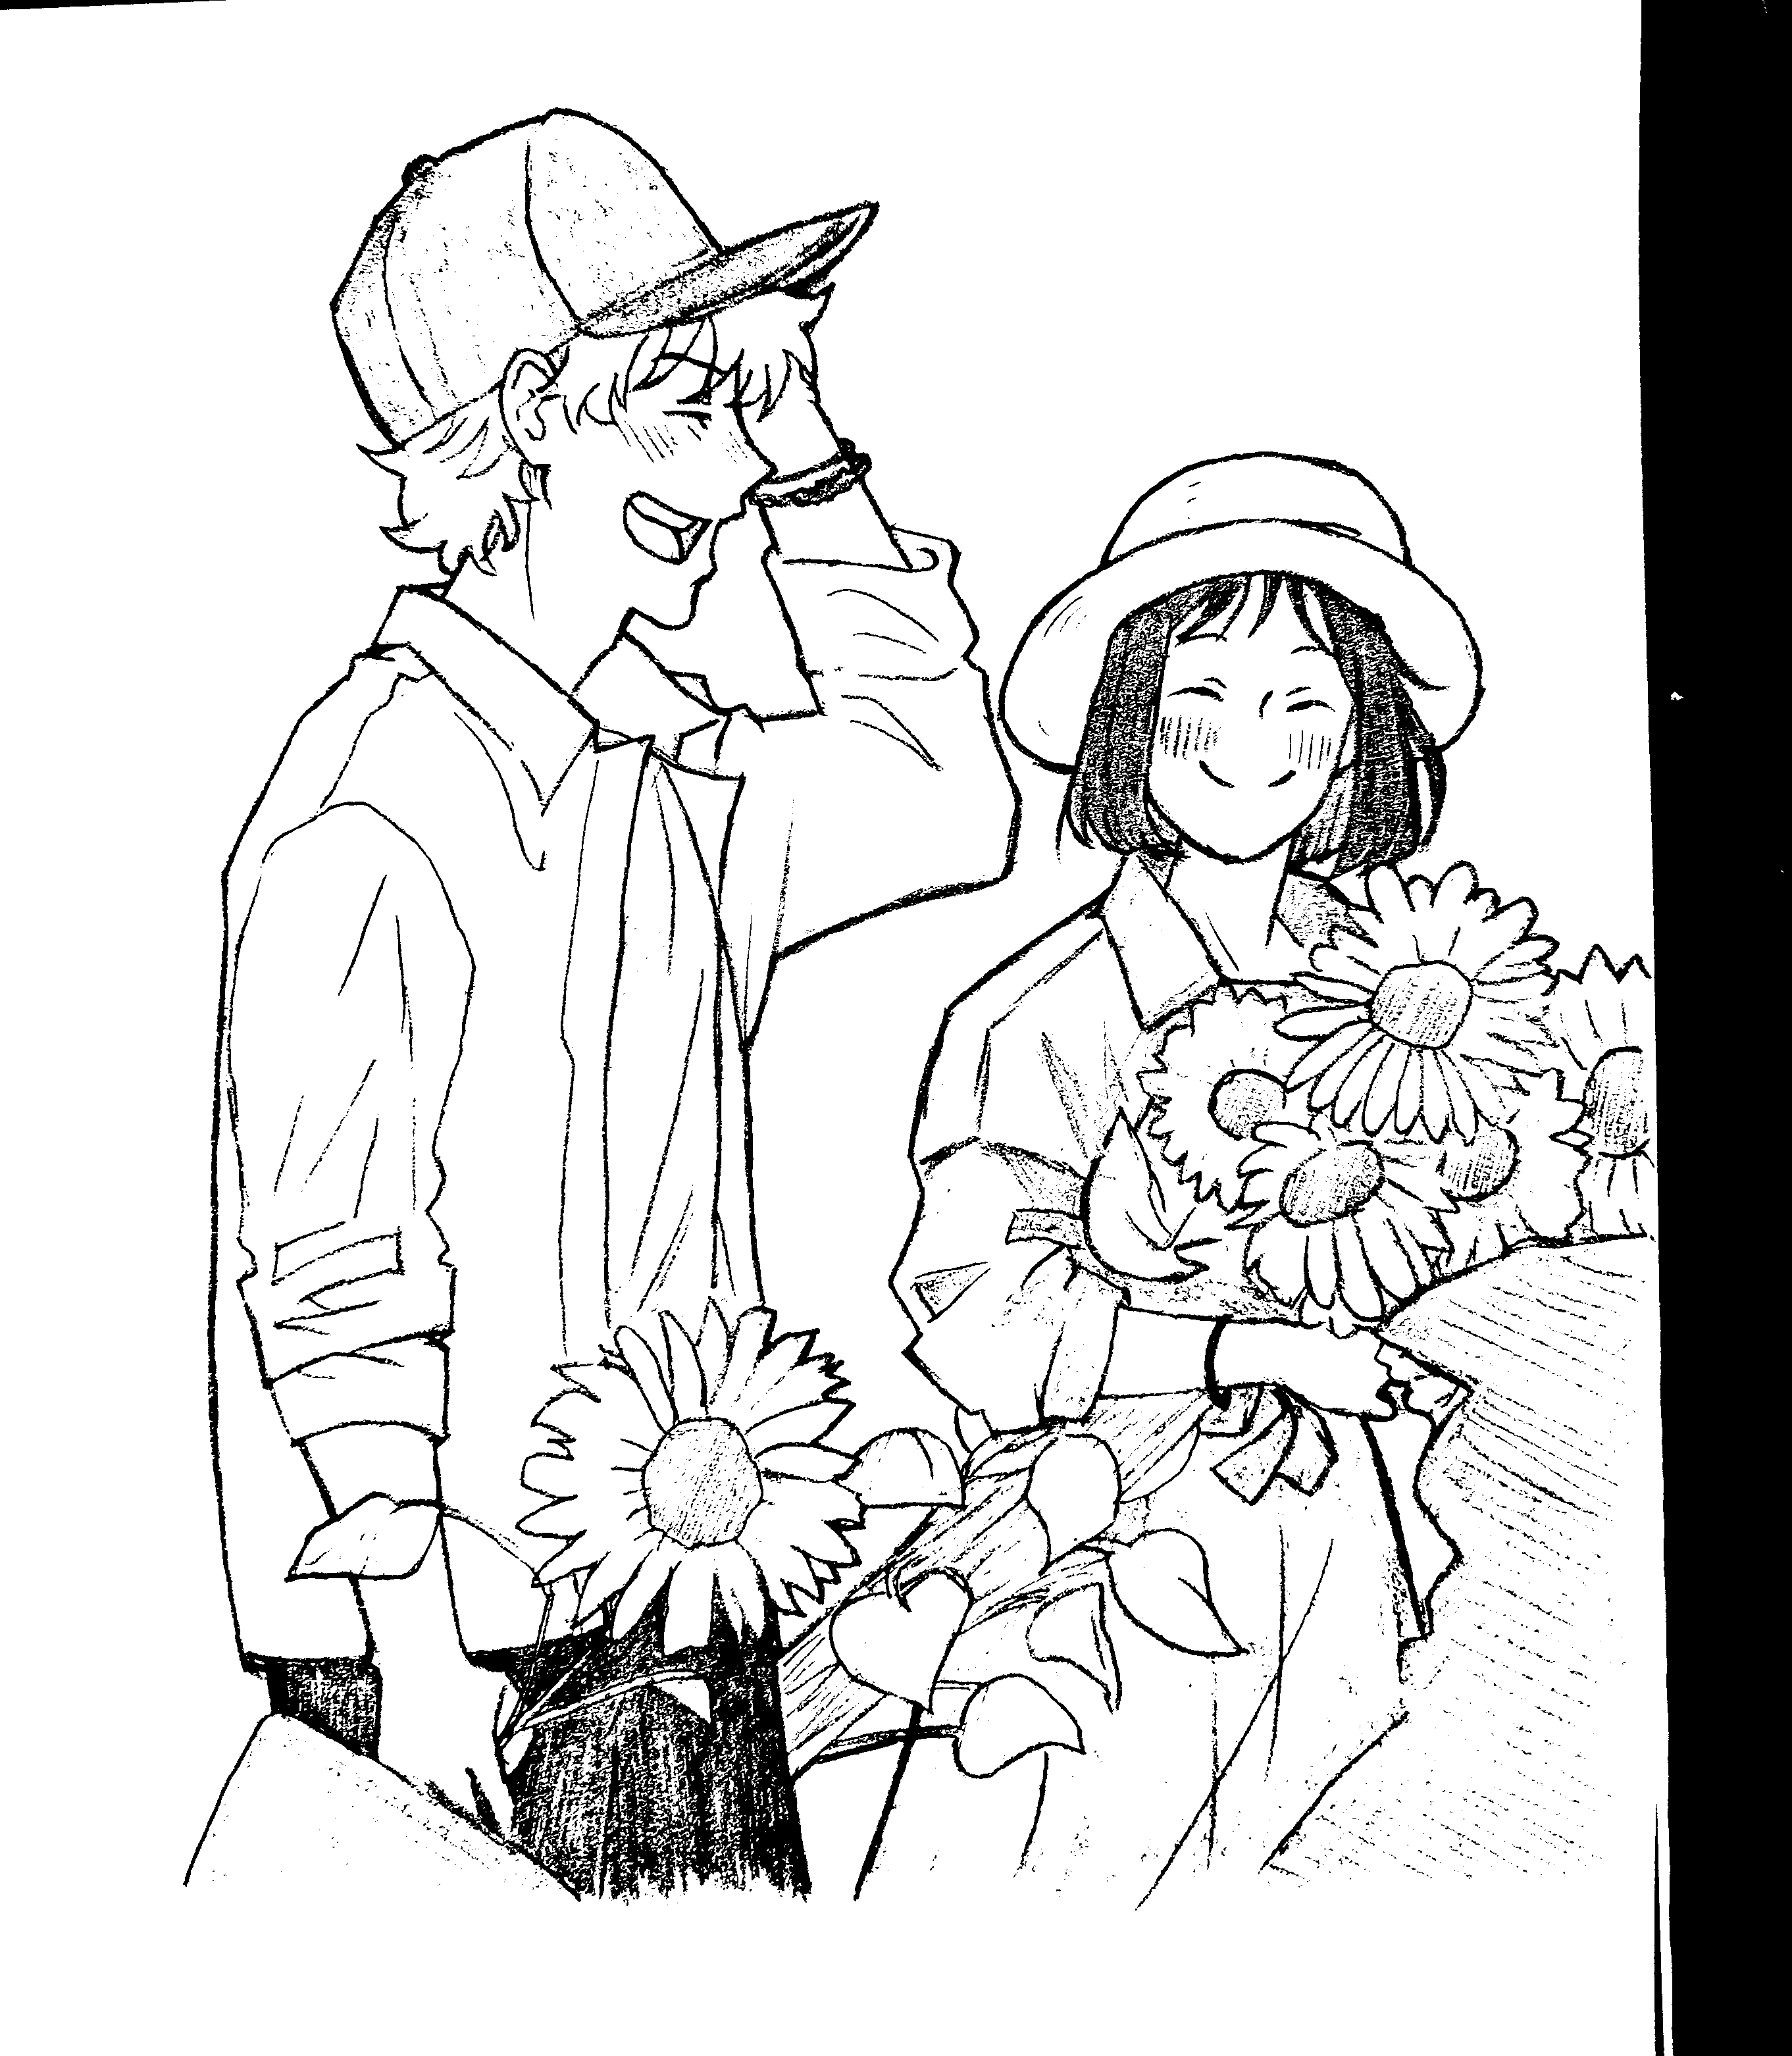

In [74]:
# generate a mask (threshold the image)
_, mask = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
cv2_imshow(mask)

In [75]:
# apply median filter to the image
kernel_size = 3 # 3x3 kernel
mask = median_filter(mask, kernel_size)

In [76]:
# generate and save the transparent image
mask = im.fromarray(mask)
mask = mask.convert("RGBA")

datas = mask.getdata()

newData = []

for item in datas:
    if item[0] == 0 and item[1] == 0 and item[2] == 0:
        newData.append(item)
    else:
        newData.append((255, 255, 255, 0))

mask.putdata(newData)
mask.save("/content/transparent.png", "PNG")